# Predict Walmart Weekly Sales

## Topic and Goal

The primary objective of this project is to develop a predictive model for Walmart's weekly sales using machine learning techniques. This project aims to tackle a regression problem, which involves predicting continuous values—in this case, the weekly sales figures for Walmart stores. By leveraging historical sales data, along with various external factors such as holidays, promotions, and economic indicators, we aim to accurately forecast future sales and provide actionable insights.

Two regression models are used in this project, Linear Regression and Random Forest, to get a better prediction of Walmart's weekly sales data and compare results of different models.

[GitHub Repo](https://github.com/BaffinLee/Walmart-Weekly-Revenue-Prediction)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data

The dataset is a CSV file from [kaggle: https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data](https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data), includes 6435 lines of historical Walmart's weekly sales data.

The data columns is:

- Store: Store number
- Date: Sales week start date
- Weekly_Sales: Sales
- Holiday_Flag: Mark on the presence or absence of a holiday
- Temperature: Air temperature in the region
- Fuel_Price: Fuel cost in the region
- CPI: Consumer Consumer price index
- Unemployment: Unemployment rate


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BaffinLee/Walmart-Weekly-Revenue-Prediction/main/Walmart_Sales.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


The weekly sales are mainly distributed between \$500000 and \$2000000.

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

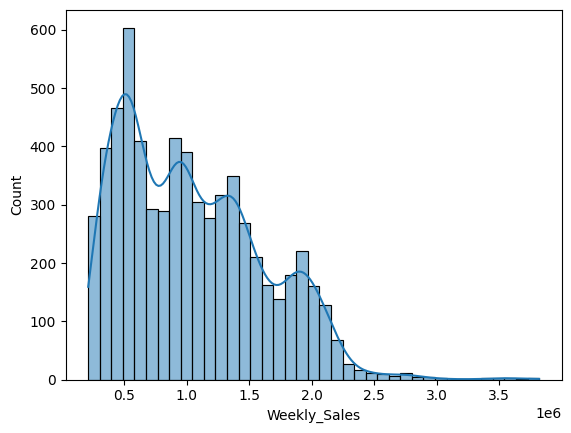

In [ ]:
sns.histplot(df['Weekly_Sales'], kde=True)

## Data cleaning

First of all, all rows with null cell should be removed, as it will disturb the training process.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


<Axes: ylabel='Weekly_Sales'>

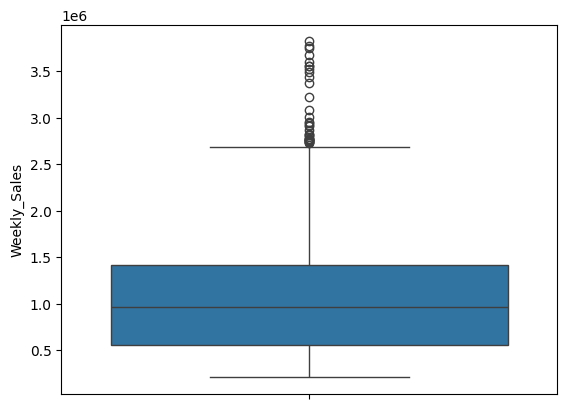

In [ ]:
data_cleaned = df.dropna()
print(data_cleaned.info())
sns.boxplot(data_cleaned['Weekly_Sales'])

As you can see, the boxplot shows there are some datapoints are far away from the normal datapoints, let's remove them.

In [ ]:
data_cleaned = data_cleaned[data_cleaned['Weekly_Sales'] < 3000000]
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6421 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6421 non-null   int64  
 1   Date          6421 non-null   object 
 2   Weekly_Sales  6421 non-null   float64
 3   Holiday_Flag  6421 non-null   int64  
 4   Temperature   6421 non-null   float64
 5   Fuel_Price    6421 non-null   float64
 6   CPI           6421 non-null   float64
 7   Unemployment  6421 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 451.5+ KB
None


The Date column is not useful in this project, so I will drop it.

The Weekly_Sales column is the prediction target, should also be removed from training data.

In [ ]:
X = data_cleaned.drop(columns = ["Weekly_Sales","Date"])
y = data_cleaned['Weekly_Sales']
print(X.info())
print(X.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6421 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6421 non-null   int64  
 1   Holiday_Flag  6421 non-null   int64  
 2   Temperature   6421 non-null   float64
 3   Fuel_Price    6421 non-null   float64
 4   CPI           6421 non-null   float64
 5   Unemployment  6421 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 351.1 KB
None
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0      1             0        42.31       2.572  211.096358         8.106
1      1             1        38.51       2.548  211.242170         8.106
2      1             0        39.93       2.514  211.289143         8.106
3      1             0        46.63       2.561  211.319643         8.106
4      1             0        46.50       2.625  211.350143         8.106


## Exploratory Data Analysis

Let's use Correlation Matrix to understand the relationship between different variables in the dataset. In the heatmap below, we can see that CPI has negative correlation with unemployment rate, but this is not yet to the point where multicollinearity is a concern. The store column has some correlation with CPI and umemployment rate, which has something to do with the store's location, that is understandable.

<Axes: >

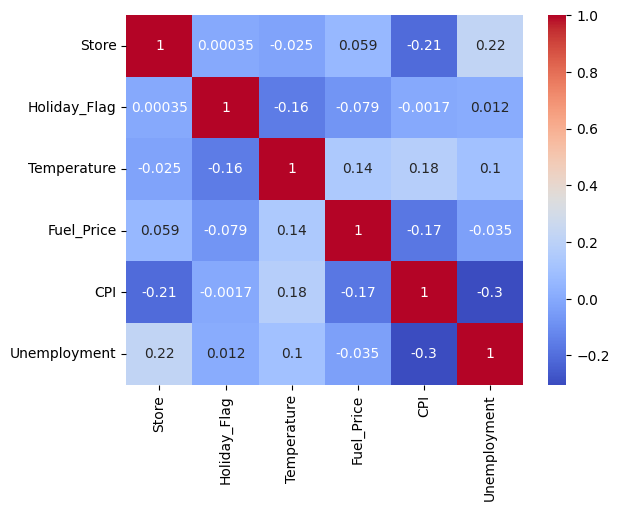

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

The pair plot also shows similar conclusion.

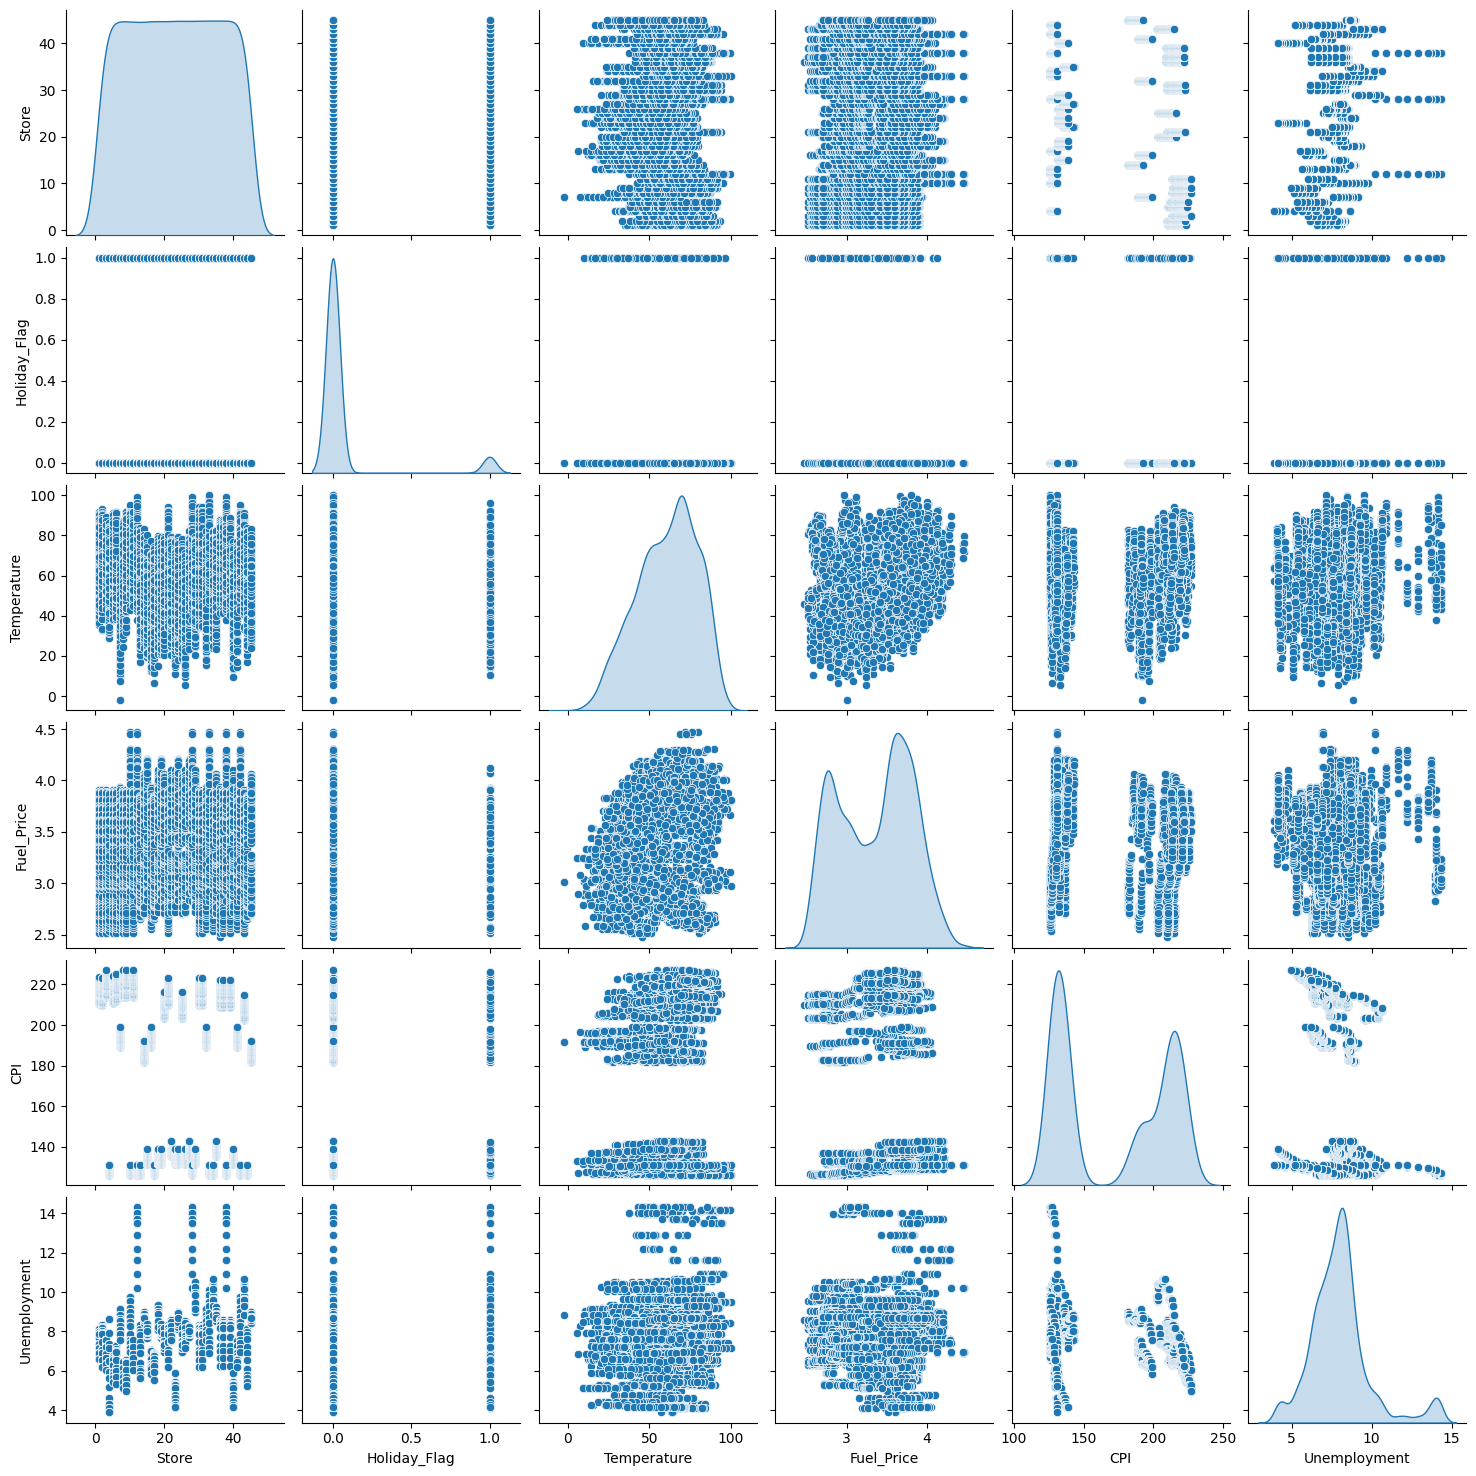

In [ ]:
sns.pairplot(X, diag_kind='kde')

With heapmap and pairplot, we can draw a conslusion that there is no multicollinearity in the dataset, which is good.

So let's divide the dataset to training data and testing data, 80% of data will be used as training data, the rest will be testing data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5136 entries, 1718 to 3934
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5136 non-null   int64  
 1   Holiday_Flag  5136 non-null   int64  
 2   Temperature   5136 non-null   float64
 3   Fuel_Price    5136 non-null   float64
 4   CPI           5136 non-null   float64
 5   Unemployment  5136 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 280.9 KB
None


## Model

Because this is a regression problem, and the features show no multicollinearity, I will try linear regression model and random forest model to train and predict weekly sales.

### Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)
print(model.score(X_test, y_test))

1923016.2191863009 [-14820.48716806  82811.82793276   -885.09874209  14062.8429394
  -2171.87075702 -21243.68128326]
0.1481761691015081


The coefficients of linear regression model shows feature Store and Unemployment are most important features, while Temperature is the lease important feature. The score of this model shows that linear regression is not a good model for this problem, the best score is 1 and I only got score around 0.148

### Random Forest

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9391716313992539


The result of random forest regression model is pretty good, I got score 0.939, the best is 1. Let's use standard scaler to scale our train and test data, it might improve the performance of our model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_cleaned = StandardScaler()
X_train_scaled = scaler_cleaned.fit_transform(X_train)
X_test_scaled = scaler_cleaned.transform(X_test)

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled, y_test))

0.941127088073887


After I use standard scaler to sclae the train and test data, my model performs slightly better, I got score 0.941

## Results and Analysis

In the above process, I tried two models, linear regression and random forest regression. As the result shows, linear regression is not good for this problem, while random forest model performs really good. I also use stand scaler from sklearn to sclae my dataset make the result even better. At the end of my model training process, I got score of 0.94, which means my model can predict Walmart's weekly sales data 94% correctly.

In the end of my project, I will change the hyperparameters of random forest model, to findout what will happen if I don't the default parameters of sklearn.

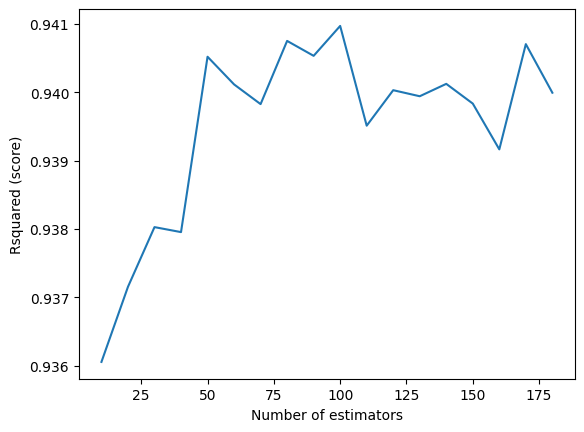

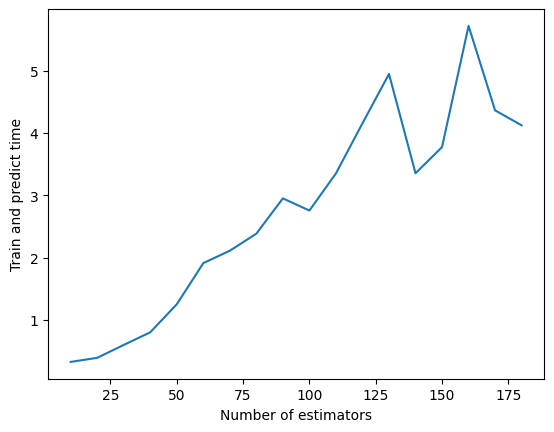

In [ ]:
import time

estimators = range(10, 181, 10)
scores = []
times = []
for e in estimators:
  start = time.time()
  model = RandomForestRegressor(n_estimators=e)
  model.fit(X_train_scaled, y_train)
  scores.append(model.score(X_test_scaled, y_test))
  times.append(time.time() - start)

plt.xlabel('Number of estimators')
plt.ylabel('Rsquared (score)')
plt.plot(estimators, scores)
plt.show()

plt.xlabel('Number of estimators')
plt.ylabel('Train and predict time')
plt.plot(estimators, times)
plt.show()

The above plots show that as the number of estimators go up from 10 to 200, (the default of random forest regressor in sklearn is 100), the r squared score go up, the score is pretty mush the same after number of estimators is bigger than 75. In the other hand, the bigger the number of estimators, the more time for training and testing model is required.

So we can use n_estimators=75, to make sure our model training process is fast and the result is good enough. It will also prevent our model from being overfiting.

So the final model is:

In [ ]:
model = RandomForestRegressor(n_estimators=75)
model.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled, y_test))

0.9412479448580999


## Discussion and Conclusion



In the end, let's discuss the project a little bit, draw some conclusion.

In the data preparing process, I drop some unuseful column, and removing outliers from the data resulted in improved model performance.

In the model training part, I used linear regression model first, and that didn't went well, why is that? My guess is that the first column of my dataset is the ID of a Walmart store, even that's a number, it's kind of a category value, not linear number value. And linear model is too simple for this problem, so my linear regression model didn't work well.

Then I did some fine tuning about the n_estimators superparameter of the random forest model, I changed it to make sure my model performs well and the time of training process is reasonable.

That's all of it, the Walmart's weekly sales model should predict the future sale well and have great business value about helping store managers to estimate sales data and prepare for the future arrangement.